<a href="https://colab.research.google.com/github/MuralidharB/tft-stocks/blob/master/close_open.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Small python script that plots the difference between close and open prices of s&p stocks

In [ ]:
# Installation
!pip install yfinance
!pip install yahoo_fin --upgrade


In [14]:
import random

## Hyper parameters
history = "5y"
buy_trigger = 3                           # times standard deviation
sell_trigger = 1                          # times the avg cost of the security to grow before we sell
security_age = 15                         # number of days to hold the security before we cut the losses
lockin_gains_factor = 1000                # times the orignal amount to grow before we lockin the gains.
mean_type = "+ve"                         # only consider stocks with +ve mean of ND. These stocks have been growing over the period of time
max_stocks_to_buy = 5                     # number of stocks to buy at buy trigger. We can change this value to be more adaptive based on market cap of the security and other parameters.
backtest_iterations = 50                   # number of backtests to run
backtest_days = random.sample(range(100, 400), backtest_iterations) # starting days for back testing
backtest_days.sort()
prefer_beta = True

starting_balance = 10000                  # seed money to start investing
current_account = original_balance = starting_balance
portfolio = {}

# Display test results
print_final_portfolio = False              # Prints the portfolio list at the end of each backtest iteration
plot_every_test_graph = True              # Prints the model performance during the back end against s&P500
plot_summary_graph = True                  # prints the summary graph

In [15]:
tests = [
    {
        "Name": "Test 1",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 15,
        "lockin_gains_factor": 1000,
        "prefer_beta": True
     },
     {
        "Name": "Test 2",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 15,
        "lockin_gains_factor": 1.1,
        "prefer_beta": True
     },
     {
        "Name": "Test 3",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 1000,
        "lockin_gains_factor": 1.1,
        "prefer_beta": True
     },
     {
        "Name": "Test 4",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 1000,
        "lockin_gains_factor": 1.1,
        "prefer_beta": False
     },
     {
        "Name": "Test 5",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 90,
        "lockin_gains_factor": 1.1,
        "prefer_beta": True
     },
     {
        "Name": "Test 5",
        "buy_trigger": 2,
        "sell_trigger": 1,
        "security_age": 90,
        "lockin_gains_factor": 1.1,
        "prefer_beta": False
     },
]

tests_to_run = [5,6]

In [16]:
import yfinance as yahooFinance
import yahoo_fin.stock_info as si
import tensorflow as tf
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import numpy as np
import pprint

pp = pprint.PrettyPrinter(indent=4)

stocks = si.tickers_sp500()
indices = ['^IXIC', '^GSPC', '^DJI']
stocks_ts = pd.DataFrame()
stocks_spread = pd.DataFrame()
indices_ts = pd.DataFrame()

for idx in indices:
    data = yahooFinance.Ticker(idx).history(period=history)
    d = data.copy()[['Open', 'Close']]
    indices_ts[idx+"_Open"] = d['Open']
    indices_ts[idx+"_Close"] = d['Close']

betas = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/betas.csv")
betas = betas.drop(['index', 'Attribute', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)
betas = betas.rename(columns={"Recent": "Beta"})
betas = betas.set_index('Ticker')
for stock in stocks:
    data = yahooFinance.Ticker(stock).history(period=history)
    d = data.copy()[['Open', 'Close']]
    stocks_ts[stock+"_Open"] = d['Open']
    stocks_ts[stock+"_Close"] = d['Close']
    stocks_spread[stock] = (d['Close'] - d['Open']) * 100/d['Open']

    stocks_ts = stocks_ts.copy()
    stocks_spread = stocks_spread.copy()


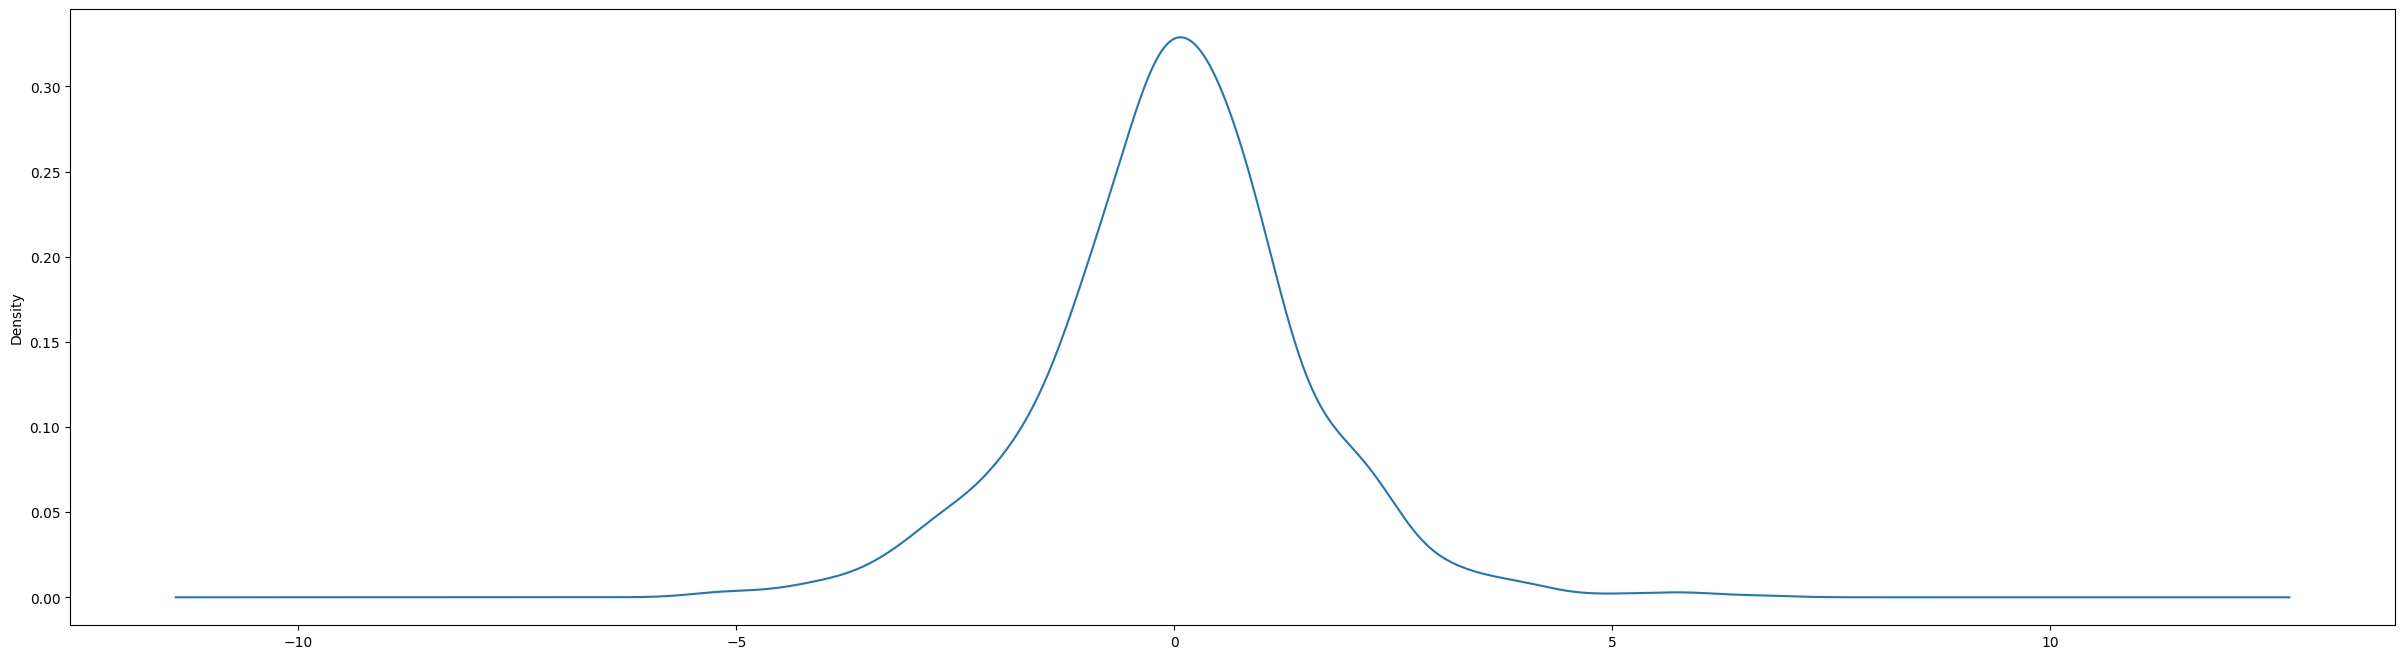

In [17]:

for stock in stocks[:1]:
    #latest[stock] = data.iloc[-1]['Close'] - data.iloc[-1]['Open']

    fig = go.Figure(data=[go.Candlestick(x=d.index,
                open=d['Open'],
                high=d['Open'],
                low=d['Close'],
                close=d['Close'])])
    fig.update_layout(
      title=stock,
      yaxis_title=stock +' Stock',
      shapes = [dict(
          x0='2022-12-09', x1='2022-12-09', y0=0, y1=1, xref='x', yref='paper',
          line_width=2)],
      annotations=[dict(
          x='2022-12-09', y=0.05, xref='x', yref='paper',
          showarrow=False, xanchor='left', text='Increase Period Begins')]
    )

    fig.show()

    stocks_spread['Date'] = stocks_spread.index
    fig = px.line(stocks_spread, x="Date", y=stock, title="Stocks Daily Price change", markers=True) 
    fig.show()

    x = pd.Series(stocks_spread[stock])
    ax = x.plot.kde(figsize=(30,8))
    #sns.set(rc={'figure.figsize':(25.7,8.27)})
    #sns.lineplot(x="Date",y=stock, data=stocks_spread, markers=True, err_style="bars")
    #sns.despine();

In [18]:
#print(stocks_spread.describe())
std = stocks_spread.describe().loc['std']
mean = stocks_spread.describe().loc['mean']
std = pd.DataFrame.from_dict(std)
std.columns = ['std',]

mean = pd.DataFrame.from_dict(mean)
mean.columns = ['mean',]

fig = px.line(std, title="Daily Stock Price change", markers=True)
fig.show()


In [19]:
stocks_ts

A_Open     A_Close   AAL_Open  AAL_Close  \
Date                                                                      
2018-04-02 00:00:00-04:00   64.323588   62.181076  50.555504  48.612186   
2018-04-03 00:00:00-04:00   62.673290   63.136532  49.051627  50.262539   
2018-04-04 00:00:00-04:00   61.910862   63.165482  49.412947  50.819168   
2018-04-05 00:00:00-04:00   63.522541   63.387428  51.268376  50.916821   
2018-04-06 00:00:00-04:00   62.740837   61.428307  50.496911  49.110226   
...                               ...         ...        ...        ...   
2023-03-27 00:00:00-04:00  133.580002  133.070007  13.960000  13.940000   
2023-03-28 00:00:00-04:00  132.539993  132.630005  13.910000  13.980000   
2023-03-29 00:00:00-04:00  133.949997  133.850006  14.180000  14.350000   
2023-03-30 00:00:00-04:00  135.270004  134.490005  14.560000  14.470000   
2023-03-31 00:00:00-04:00  135.399994  138.339996  14.610000  14.750000   

                             AAP_Open   AAP_Close   AAPL_Open  AAPL_Close  \
Date                                                                        
2018-04-02 00:00:00-04:00  111.562414  105.279327   39.715360   39.724892   
2018-04-03 00:00:00-04:00  105.815445  105.260506   39.953695   40.132442   
2018-04-04 00:00:00-04:00  103.548657  107.677818   39.295895   40.899857   
2018-04-05 00:00:00-04:00  108.599563  109.474304   41.131046   41.183479   
2018-04-06 00:00:00-04:00  108.759464  105.260506   40.747329   40.130054   
...                               ...         ...         ...         ...   
2023-03-27 00:00:00-04:00  111.949997  114.739998  159.940002  158.279999   
2023-03-28 00:00:00-04:00  114.629997  115.739998  157.970001  157.649994   
2023-03-29 00:00:00-04:00  116.320000  117.550003  159.369995  160.770004   
2023-03-30 00:00:00-04:00  119.040001  118.610001  161.529999  162.360001   
2023-03-31 00:00:00-04:00  119.900002  121.610001  162.440002  164.899994   

                            ABBV_Open  ABBV_Close  ...    YUM_Open  \
Date                                               ...               
2018-04-02 00:00:00-04:00   74.351354   72.342285  ...   77.992640   
2018-04-03 00:00:00-04:00   73.038353   71.654152  ...   76.647314   
2018-04-04 00:00:00-04:00   70.167118   73.512932  ...   76.372746   
2018-04-05 00:00:00-04:00   73.615776   72.935539  ...   78.660721   
2018-04-06 00:00:00-04:00   72.334380   71.013458  ...   78.193987   
...                               ...         ...  ...         ...   
2023-03-27 00:00:00-04:00  158.830002  157.539993  ...  128.429993   
2023-03-28 00:00:00-04:00  157.800003  158.250000  ...  128.179993   
2023-03-29 00:00:00-04:00  158.979996  158.000000  ...  128.940002   
2023-03-30 00:00:00-04:00  158.009995  157.919998  ...  128.699997   
2023-03-31 00:00:00-04:00  158.429993  159.369995  ...  130.179993   

                            YUM_Close    ZBH_Open   ZBH_Close   ZBRA_Open  \
Date                                                                        
2018-04-02 00:00:00-04:00   76.638153  101.741822   99.415283  137.860001   
2018-04-03 00:00:00-04:00   76.976784   99.499377  100.106705  138.350006   
2018-04-04 00:00:00-04:00   78.175674   99.088284  100.312286  138.190002   
2018-04-05 00:00:00-04:00   78.715637  100.807487  101.237289  140.080002   
2018-04-06 00:00:00-04:00   77.297096  100.676652   98.275368  138.500000   
...                               ...         ...         ...         ...   
2023-03-27 00:00:00-04:00  128.289993  127.117405  125.759995  290.869995   
2023-03-28 00:00:00-04:00  128.500000  125.339996  126.139999  287.760010   
2023-03-29 00:00:00-04:00  128.410004  126.050003  126.739998  293.809998   
2023-03-30 00:00:00-04:00  129.330002  127.620003  126.760002  301.910004   
2023-03-31 00:00:00-04:00  132.080002  127.919998  129.199997  310.000000   

                           ZBRA_Close  ZION_Open  ZION_Close    ZTS_Open  \
Date                                                            

In [20]:
# Determine what stocks are in buy zone and what stocks are in sell zone
# Start date of the investing

def getsellbuy(index, portfolio):
  latest = {}
  for s in stocks:
      latest[s] = (stocks_ts.loc[index][s+"_Close"] - stocks_ts.loc[index][s+"_Open"])* 100 /stocks_ts.loc[index][s+"_Open"]

  latest = pd.Series(latest)
  pd.DataFrame.from_dict(latest)
  latest_diff = pd.DataFrame.from_dict(latest)
  latest_diff.columns = ['diff',]
  #latest_diff = latest_diff.iloc[::-1]

  latest_diff['std'] = std['std']

  # Find stocks that are in buy range
  latest_diff['buy'] = np.where(((mean_type != "+ve" or mean['mean'] > 0) & (latest_diff['diff'] < 0) & (latest_diff['diff'] < -buy_trigger * std['std'])), True, False)
  latest_diff['beta'] = betas['Beta']

  # Find stocks that are in sell range
  latest_diff['sell'] = False #np.where((latest_diff['diff'] >= std['std']), True, False)
  for s in stocks:
    if s in portfolio:
      t = index - portfolio[s]['date']
      avg = sum(portfolio[s]['costs'])/len(portfolio[s]['costs'])
      if avg + sell_trigger * std['std'][s] * avg / 100 <= stocks_ts.loc[index, s+"_Close"]:
        # If the avg cost of the security has grown more than std
        #print(s, avg, portfolio[s]['costs'], std['std'][s+"_Diff"], stocks_ts.loc[index, s+"_Close"])
        latest_diff.at[s, 'sell'] = True
      elif t.days > security_age:
        # if the security has aged for certain days, cut the losses
        latest_diff.at[s, 'sell'] = True
  
  # Print which stocks are buy and which are sell
  #print("Stock to Buy on " + str(index))
  #print(latest_diff[latest_diff['buy']])
  #print()
  #print("Stocks to Sell on " + str(index))
  #print(latest_diff[latest_diff['sell']])
  sell_stocks = latest_diff[latest_diff['sell']]
  buy_stocks = latest_diff[latest_diff['buy']]
  if prefer_beta:
    buy_stocks = buy_stocks.sort_values('beta',ascending=False)
  return sell_stocks, buy_stocks


In [21]:
# We assume that we invest $100 in each stock that is in the buy zone
# and sell all stocks in the sell zone

# We will start back testing from year back. We can always change the starting point and tune the model.

def calculate_networth(backtest_start_date):
  networth = current_account
  for stock, value in portfolio.items():
    networth += value['shares'] * stocks_ts.loc[backtest_start_date][stock+"_Close"]
  return networth

def do_one_backtesting(tradingdays_togoback):
  global portfolio
  global original_balance
  global current_account

  original_balance = starting_balance
  current_account = original_balance
  portfolio = {}

  idx = int(len(stocks_ts.index)- tradingdays_togoback)
  price_movement = []
  cash_inhand = []
  for backtest_start_date in stocks_ts.index[idx:]:
      sell, buy = getsellbuy(backtest_start_date, portfolio)

      # process the stocks that are marked sell
      for st in sell.iterrows():
        stock = st[0].split('_')[0]
        if stock in portfolio:
          current_account += portfolio[stock]['shares'] * stocks_ts.loc[backtest_start_date][stock+"_Close"]
          portfolio.pop(stock)
      
      # buy stocks that are marked by. We are buying max_stocks_to_buy number of stocks
      # TODO: The number of stocks to be must be adaptive. Will come up with some
      # algorithm based on:
      # 1. Market capitalization
      # 2. Beta
      # and other criteria
      # The goal is to put the money to work
      for st in buy.iterrows():
        stock = st[0].split('_')[0]
        if current_account > max_stocks_to_buy * stocks_ts.loc[backtest_start_date][stock+"_Close"]:
          current_account -= max_stocks_to_buy * stocks_ts.loc[backtest_start_date][stock+"_Close"]
          if not stock in portfolio:
              assert portfolio.get(stock, None) == None
              portfolio[stock] = {'shares': 0, 'costs':[], 'date': backtest_start_date}
          portfolio[stock]['shares'] += max_stocks_to_buy
          for i in range(max_stocks_to_buy):
            portfolio[stock]['costs'].append(stocks_ts.loc[backtest_start_date][stock+"_Close"])

      # lock in the gains after 10% increase of networth
      nw = calculate_networth(backtest_start_date)
      price_movement.append(nw)
      cash_inhand.append(current_account)
      if nw > original_balance * lockin_gains_factor:
          #print(backtest_start_date, calculate_networth(backtest_start_date), current_account, portfolio)
          for stock, value in portfolio.items():
            current_account += value['shares'] * stocks_ts.loc[backtest_start_date][stock+"_Close"]
          portfolio = {}
          original_balance = current_account
          #print(current_account, portfolio)
      #print(current_account, portfolio)
  return calculate_networth(backtest_start_date), current_account, price_movement, cash_inhand

In [22]:

def run_backtest():
  nws = {}
  sp_ret = {}
  for i in backtest_days:
    tradingdays_togoback = i
    networth, current, pm, cih = do_one_backtesting(tradingdays_togoback)
    # normalize s&p500 for starting balance
    idx_list = list(indices_ts.loc[indices_ts.index[-tradingdays_togoback:], "^GSPC_Close"] * starting_balance/indices_ts.loc[indices_ts.index[-tradingdays_togoback], "^GSPC_Close"])
    pm_pct = (pm[-1]-pm[0])*100/pm[0]
    d = pd.DataFrame({'Portfolio_Performance':pm,'SP_Performance':idx_list, "Cash_In_Hand": cih})
    d.index = indices_ts.index[-tradingdays_togoback:]
    idx_pct = (idx_list[-1] - idx_list[0])*100/idx_list[0]
    print("Total networth: %d (Cash %d) after going back %d" % (networth, current_account, tradingdays_togoback))
    print("Model (%f)%% vs S&P Performance (%f)%%" % (pm_pct, idx_pct))
    if print_final_portfolio:
      pp.pprint(portfolio)
    nws[i] = networth
    sp_ret[i] = idx_list[-1]
    if plot_every_test_graph:
      fig = px.line(d, title="Model (%f)%% vs S&P Performance (%f)%%" % (pm_pct, idx_pct), markers=True)
      fig.show()

  if plot_summary_graph:
    plt.plot(nws.keys(), nws.values(), color="green", label='Model')
    plt.plot(sp_ret.keys(), sp_ret.values(), color="blue", label='S&P 500')
    plt.title("Networth at the end of each iteration")
    plt.xlabel('Days') 
    plt.ylabel('Networth')
    plt.legend()
    plt.show()
    print(sum(nws.values())/len(nws))

Test Parameters for Test 5
{   'Name': 'Test 5',
    'buy_trigger': 2,
    'lockin_gains_factor': 1.1,
    'prefer_beta': True,
    'security_age': 90,
    'sell_trigger': 1}
Total networth: 12493 (Cash 4198) after going back 103
Model (24.939831)% vs S&P Performance (9.299174)%


Total networth: 11588 (Cash 654) after going back 110
Model (15.883401)% vs S&P Performance (8.215487)%


Total networth: 12503 (Cash 4207) after going back 113
Model (25.032970)% vs S&P Performance (11.207909)%


Total networth: 12584 (Cash 2428) after going back 116
Model (25.849491)% vs S&P Performance (14.686846)%


Total networth: 12707 (Cash 2694) after going back 132
Model (27.075761)% vs S&P Performance (9.348616)%


Total networth: 12507 (Cash 2451) after going back 134
Model (25.075603)% vs S&P Performance (6.571181)%


Total networth: 11589 (Cash 655) after going back 138
Model (15.892298)% vs S&P Performance (4.138359)%


Total networth: 10072 (Cash 218) after going back 142
Model (0.721978)% vs S&P Performance (2.574276)%


Total networth: 11117 (Cash 1104) after going back 153
Model (11.174226)% vs S&P Performance (-0.470361)%


Total networth: 10937 (Cash 1167) after going back 157
Model (9.377654)% vs S&P Performance (-3.854198)%


Total networth: 10937 (Cash 1167) after going back 160
Model (9.377654)% vs S&P Performance (-3.991445)%


Total networth: 11089 (Cash 1247) after going back 169
Model (10.890581)% vs S&P Performance (-0.226285)%


Total networth: 11286 (Cash 48) after going back 174
Model (12.860994)% vs S&P Performance (3.591523)%


Total networth: 11387 (Cash 210) after going back 175
Model (13.870270)% vs S&P Performance (3.727763)%


Total networth: 12479 (Cash 4368) after going back 182
Model (24.792690)% vs S&P Performance (8.089106)%


Total networth: 12576 (Cash 2563) after going back 183
Model (25.766783)% vs S&P Performance (7.607364)%


Total networth: 11774 (Cash 780) after going back 185
Model (17.749684)% vs S&P Performance (5.383681)%


Total networth: 12402 (Cash 2667) after going back 189
Model (24.027743)% vs S&P Performance (7.423673)%


Total networth: 13742 (Cash 2466) after going back 199
Model (37.429451)% vs S&P Performance (12.068934)%


Total networth: 12728 (Cash 4604) after going back 206
Model (27.288086)% vs S&P Performance (-1.234657)%


Total networth: 11055 (Cash 2679) after going back 212
Model (10.550716)% vs S&P Performance (-1.176704)%


Total networth: 11686 (Cash 862) after going back 215
Model (16.864238)% vs S&P Performance (4.258047)%


Total networth: 11677 (Cash 853) after going back 221
Model (16.776022)% vs S&P Performance (2.527440)%


Total networth: 11677 (Cash 853) after going back 222
Model (16.776022)% vs S&P Performance (2.122826)%


Total networth: 11644 (Cash 964) after going back 225
Model (16.446286)% vs S&P Performance (2.705790)%


Total networth: 11101 (Cash 234) after going back 240
Model (11.012735)% vs S&P Performance (-7.908635)%


Total networth: 11644 (Cash 964) after going back 241
Model (16.446976)% vs S&P Performance (-6.429868)%


Total networth: 11141 (Cash 2477) after going back 252
Model (11.414742)% vs S&P Performance (-9.294966)%


Total networth: 12513 (Cash 4402) after going back 269
Model (25.132543)% vs S&P Performance (-1.471938)%


Total networth: 12410 (Cash 2582) after going back 270
Model (24.106538)% vs S&P Performance (-2.184666)%


Total networth: 12399 (Cash 2836) after going back 278
Model (23.998639)% vs S&P Performance (-2.749732)%


Total networth: 11283 (Cash 164) after going back 283
Model (12.839697)% vs S&P Performance (-8.091123)%


Total networth: 11116 (Cash 1103) after going back 294
Model (11.164644)% vs S&P Performance (-8.996463)%


Total networth: 12467 (Cash 4357) after going back 299
Model (24.679253)% vs S&P Performance (-6.821110)%


Total networth: 9875 (Cash 998) after going back 304
Model (-1.241300)% vs S&P Performance (-11.871281)%


Total networth: 11384 (Cash 2426) after going back 317
Model (13.845731)% vs S&P Performance (-14.145226)%


Total networth: 9823 (Cash 804) after going back 322
Model (-1.768677)% vs S&P Performance (-10.041768)%


Total networth: 10633 (Cash 1030) after going back 327
Model (6.339478)% vs S&P Performance (-11.986801)%


Total networth: 11078 (Cash 972) after going back 331
Model (10.784869)% vs S&P Performance (-12.320690)%


Total networth: 10324 (Cash 490) after going back 342
Model (3.245544)% vs S&P Performance (-12.529905)%


Total networth: 11062 (Cash 872) after going back 344
Model (10.628626)% vs S&P Performance (-12.356593)%


Total networth: 11335 (Cash 183) after going back 345
Model (13.352083)% vs S&P Performance (-12.584608)%


Total networth: 12473 (Cash 4362) after going back 351
Model (24.732557)% vs S&P Performance (-12.599488)%


Total networth: 12109 (Cash 978) after going back 353
Model (21.099579)% vs S&P Performance (-12.195356)%


Total networth: 12924 (Cash 1180) after going back 373
Model (29.248118)% vs S&P Performance (-6.601490)%


Total networth: 13121 (Cash 2355) after going back 377
Model (31.214345)% vs S&P Performance (-5.685740)%


Total networth: 12362 (Cash 49) after going back 378
Model (23.620458)% vs S&P Performance (-4.601930)%


Total networth: 13034 (Cash 2599) after going back 380
Model (30.348786)% vs S&P Performance (-5.590180)%


Total networth: 12651 (Cash 967) after going back 384
Model (26.519030)% vs S&P Performance (-6.513956)%


Total networth: 11059 (Cash 991) after going back 393
Model (10.599779)% vs S&P Performance (-8.545422)%


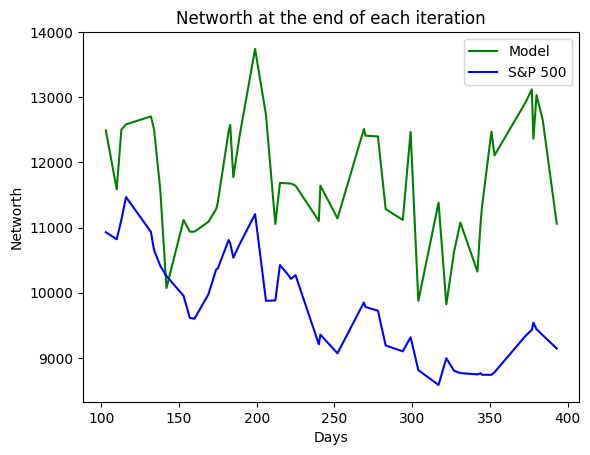

11751.710410118103


Test Parameters for Test 5
{   'Name': 'Test 5',
    'buy_trigger': 2,
    'lockin_gains_factor': 1.1,
    'prefer_beta': False,
    'security_age': 90,
    'sell_trigger': 1}
Total networth: 11055 (Cash 764) after going back 103
Model (10.553859)% vs S&P Performance (9.299174)%


Total networth: 10612 (Cash 564) after going back 110
Model (6.124334)% vs S&P Performance (8.215487)%


Total networth: 11251 (Cash 960) after going back 113
Model (12.515560)% vs S&P Performance (11.207909)%


Total networth: 12002 (Cash 1210) after going back 116
Model (20.028699)% vs S&P Performance (14.686846)%


Total networth: 12360 (Cash 2395) after going back 132
Model (23.603541)% vs S&P Performance (9.348616)%


Total networth: 11129 (Cash 1185) after going back 134
Model (11.294836)% vs S&P Performance (6.571181)%


Total networth: 11386 (Cash 2393) after going back 138
Model (13.864325)% vs S&P Performance (4.138359)%


Total networth: 10040 (Cash 2833) after going back 142
Model (0.408742)% vs S&P Performance (2.574276)%


Total networth: 11333 (Cash 2906) after going back 153
Model (13.332199)% vs S&P Performance (-0.470361)%


Total networth: 11322 (Cash 3181) after going back 157
Model (13.220775)% vs S&P Performance (-3.854198)%


Total networth: 11322 (Cash 3181) after going back 160
Model (13.220775)% vs S&P Performance (-3.991445)%


Total networth: 11118 (Cash 2060) after going back 169
Model (11.185720)% vs S&P Performance (-0.226285)%


Total networth: 11043 (Cash 2349) after going back 174
Model (10.438409)% vs S&P Performance (3.591523)%


Total networth: 11320 (Cash 2750) after going back 175
Model (13.208622)% vs S&P Performance (3.727763)%


Total networth: 11469 (Cash 1080) after going back 182
Model (14.691983)% vs S&P Performance (8.089106)%


Total networth: 11436 (Cash 1354) after going back 183
Model (14.360149)% vs S&P Performance (7.607364)%


Total networth: 11413 (Cash 754) after going back 185
Model (14.135996)% vs S&P Performance (5.383681)%


Total networth: 11218 (Cash 3165) after going back 189
Model (12.188464)% vs S&P Performance (7.423673)%


Total networth: 12837 (Cash 1559) after going back 199
Model (28.373296)% vs S&P Performance (12.068934)%


Total networth: 11177 (Cash 1096) after going back 206
Model (11.779446)% vs S&P Performance (-1.234657)%


Total networth: 11244 (Cash 2964) after going back 212
Model (12.447019)% vs S&P Performance (-1.176704)%


Total networth: 10950 (Cash 1051) after going back 215
Model (9.504567)% vs S&P Performance (4.258047)%


Total networth: 11218 (Cash 1169) after going back 221
Model (12.184857)% vs S&P Performance (2.527440)%


Total networth: 11218 (Cash 1169) after going back 222
Model (12.184857)% vs S&P Performance (2.122826)%


Total networth: 11402 (Cash 1115) after going back 225
Model (14.020421)% vs S&P Performance (2.705790)%


Total networth: 11342 (Cash 2489) after going back 240
Model (13.427014)% vs S&P Performance (-7.908635)%


Total networth: 11057 (Cash 2382) after going back 241
Model (10.579705)% vs S&P Performance (-6.429868)%


Total networth: 11345 (Cash 2492) after going back 252
Model (13.455346)% vs S&P Performance (-9.294966)%


Total networth: 12982 (Cash 4212) after going back 269
Model (29.822262)% vs S&P Performance (-1.471938)%


Total networth: 11387 (Cash 1971) after going back 270
Model (13.873299)% vs S&P Performance (-2.184666)%


Total networth: 12722 (Cash 3764) after going back 278
Model (27.228939)% vs S&P Performance (-2.749732)%


Total networth: 10416 (Cash 1338) after going back 283
Model (4.167932)% vs S&P Performance (-8.091123)%


Total networth: 11469 (Cash 1080) after going back 294
Model (14.692933)% vs S&P Performance (-8.996463)%


Total networth: 11047 (Cash 812) after going back 299
Model (10.477945)% vs S&P Performance (-6.821110)%


Total networth: 10226 (Cash 710) after going back 304
Model (2.263308)% vs S&P Performance (-11.871281)%


Total networth: 10486 (Cash 680) after going back 317
Model (4.860455)% vs S&P Performance (-14.145226)%


Total networth: 11224 (Cash 829) after going back 322
Model (12.241601)% vs S&P Performance (-10.041768)%


Total networth: 10311 (Cash 12) after going back 327
Model (3.115349)% vs S&P Performance (-11.986801)%


Total networth: 9831 (Cash 434) after going back 331
Model (-1.681374)% vs S&P Performance (-12.320690)%


Total networth: 10380 (Cash 1304) after going back 342
Model (3.803186)% vs S&P Performance (-12.529905)%


Total networth: 11810 (Cash 1222) after going back 344
Model (18.103675)% vs S&P Performance (-12.356593)%


Total networth: 10435 (Cash 210) after going back 345
Model (4.358977)% vs S&P Performance (-12.584608)%


Total networth: 10762 (Cash 703) after going back 351
Model (7.627239)% vs S&P Performance (-12.599488)%


Total networth: 11042 (Cash 1353) after going back 353
Model (10.428827)% vs S&P Performance (-12.195356)%


Total networth: 10993 (Cash 2369) after going back 373
Model (9.937965)% vs S&P Performance (-6.601490)%


Total networth: 11663 (Cash 963) after going back 377
Model (16.630117)% vs S&P Performance (-5.685740)%


Total networth: 12405 (Cash 1571) after going back 378
Model (24.059321)% vs S&P Performance (-4.601930)%


Total networth: 11981 (Cash 2507) after going back 380
Model (19.813762)% vs S&P Performance (-5.590180)%


Total networth: 11090 (Cash 1203) after going back 384
Model (10.909071)% vs S&P Performance (-6.513956)%


Total networth: 11231 (Cash 750) after going back 393
Model (12.311520)% vs S&P Performance (-8.545422)%


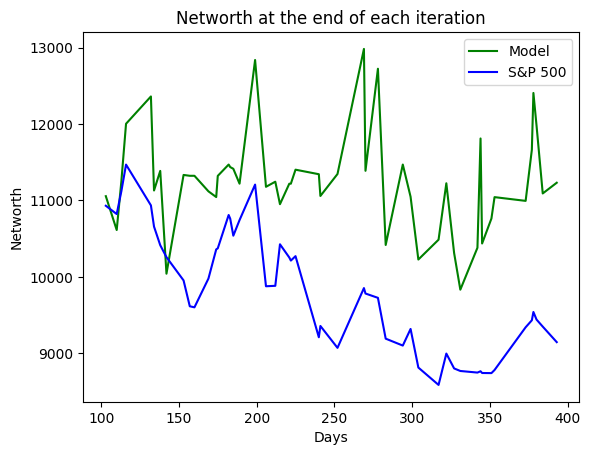

11250.759646987915




In [23]:

for i in tests_to_run:
  t = tests[i-1]
  buy_trigger = t['buy_trigger']    # times standard deviation
  sell_trigger = t['sell_trigger']   # times the avg cost of the security to grow before we sell
  security_age = t['security_age']  # number of days to hold the security before we cut the losses
  lockin_gains_factor = t['lockin_gains_factor'] # times the orignal amount to grow before we lockin the gains.
  prefer_beta = t['prefer_beta']
  print("Test Parameters for " + t['Name'])
  print("=================================")
  pp.pprint(t)
  run_backtest()
  print()
  print("==================================\n")